In [ ]:
#load the dataset
!kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset
!unzip yoga-pose-image-classification-dataset.zip

#We want to get joint data from the images

<class 'mediapipe.python.solution_base.SolutionOutputs'>


I0000 00:00:1755111412.640802 2259491 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M4
W0000 00:00:1755111412.706943 2266061 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755111412.717697 2266067 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


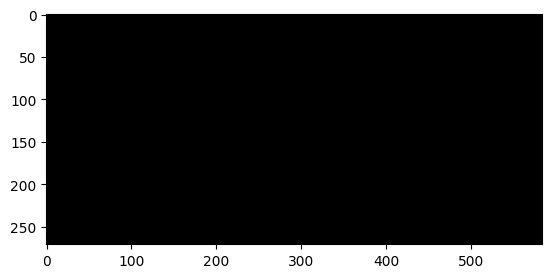

In [ ]:
#for pose detection
import mediapipe as mp 

#for image input output operations
import matplotlib.pyplot as plt
import matplotlib.image as pimg

mp_pose = mp.solutions.pose.Pose(min_detection_confidence=0.7,
                                 min_tracking_confidence=0.7)

img = pimg.imread('dataset/upavistha konasana/2-0.png')
plt.imshow(img)

#detecting the object using mediapipe
results = mp_pose.process(img.astype('uint8'))

print(results)